In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

from utils import load_data
from tempwages import fit_wages, wages_function, quarter2_2009, fit_temps, temperature_function

import sys, os
sys.path.append(os.path.abspath(os.path.join('../..', 'config')))

from config.plt_config import load_config

%matplotlib inline
load_config("../../config/matplotlib_config.yaml")

%load_ext autoreload
%autoreload 2

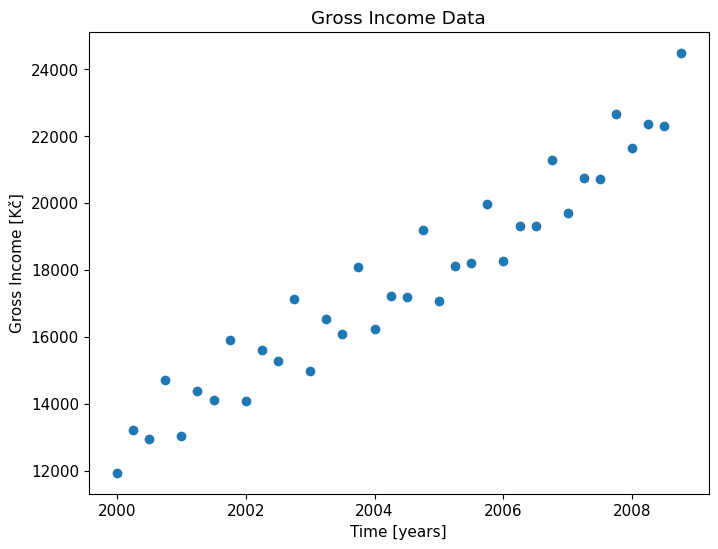

In [2]:
# load data
gross_income_path = "../data/mzdy.txt"
data_income = load_data(gross_income_path)
time = data_income[:, 0]
gross_income = data_income[:, 1]

# visualize data
plt.scatter(time, gross_income)
plt.xlabel('Time [years]')
plt.ylabel('Gross Income [Kč]')
plt.title('Gross Income Data')
plt.show()

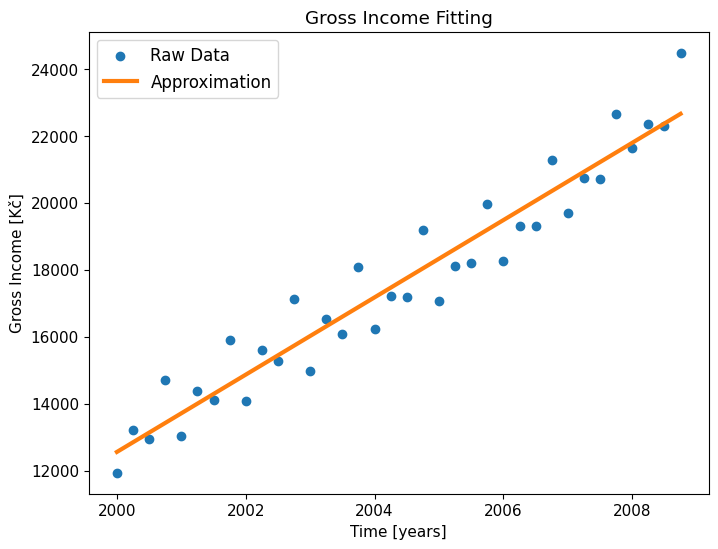

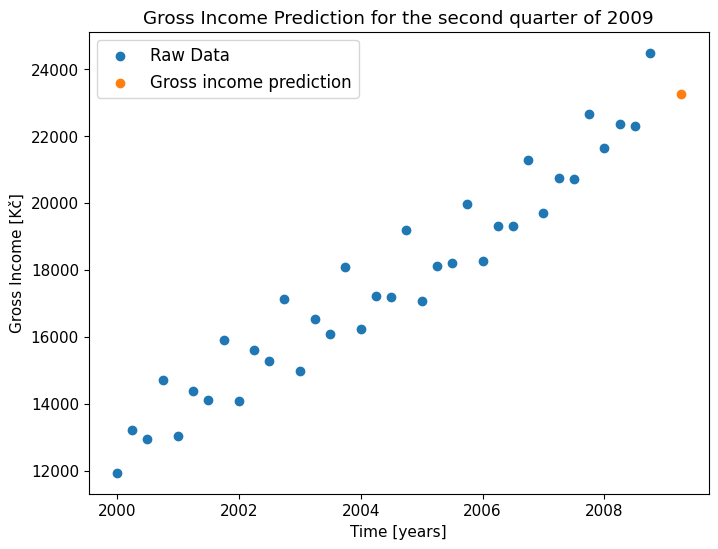

In [3]:
x = fit_wages(time, gross_income)

# visualize approximation
plt.figure()
plt.scatter(time, gross_income, color='tab:blue', label="Raw Data")
plt.plot(time, wages_function(x, time), color='tab:orange', label="Approximation")
plt.xlabel('Time [years]')
plt.ylabel('Gross Income [Kč]')
plt.title('Gross Income Fitting')
plt.legend()
plt.show()

t = 2009.25
# predict second quarter
plt.figure()
plt.scatter(time, gross_income, color='tab:blue', label="Raw Data")
plt.scatter(t, quarter2_2009(x), color='tab:orange', label="Gross income prediction")
plt.xlabel('Time [years]')
plt.ylabel('Gross Income [Kč]')
plt.title('Gross Income Prediction for the second quarter of 2009')
plt.legend()
plt.show()

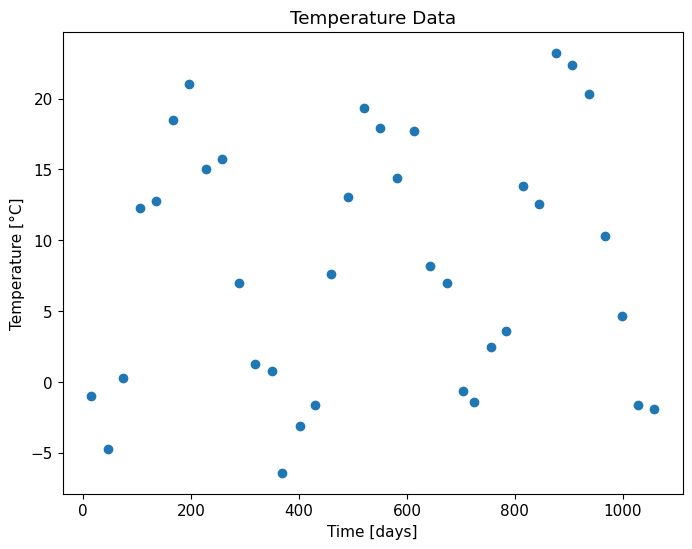

In [4]:
# load data
temperature_path = "../data/teplota.txt"
data_temperature = load_data(temperature_path)
time = data_temperature[:, 0]
temperature = data_temperature[:, 1]

# visualize data
plt.scatter(time, temperature)
plt.xlabel('Time [days]')
plt.ylabel('Temperature [°C]')
plt.title('Temperature Data')
plt.savefig("../figures/gross_income.svg")
plt.show()

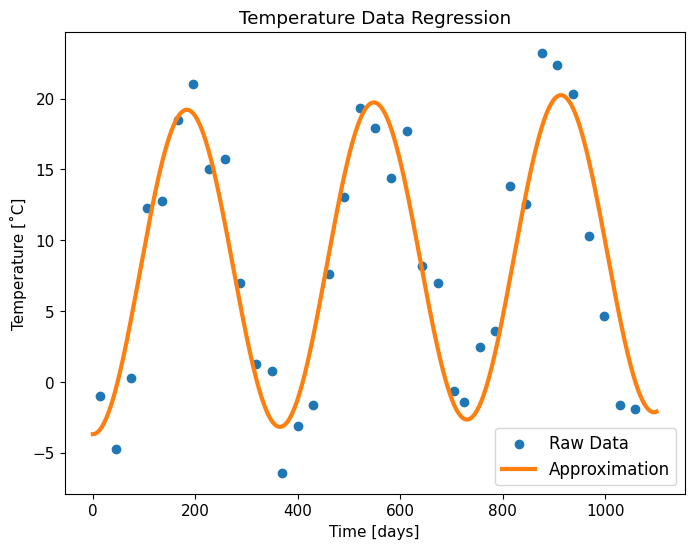

In [5]:
omega = 2 * np.pi/ 365
t = np.linspace(0, 1100, num=10000)
x = fit_temps(time, temperature, omega)

# visualize approximation
plt.figure()
plt.scatter(time, temperature, color='tab:blue', label="Raw Data")
plt.plot(t, temperature_function(x, omega, t), color='tab:orange', label="Approximation")
plt.xlabel('Time [days]')
plt.ylabel('Temperature [˚C]')
plt.title('Temperature Data Regression')
plt.legend()
plt.savefig("../figures/temperature.svg")
plt.show()